In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [2]:
data=pd.read_excel("62acae7080279_sample_data__1_.xls")

In [3]:
data.head()

,date,open,high,low,close,volume
0,2022-01-03 09:15:00,252.70,254.25,252.35,252.60,319790
1,2022-01-03 09:30:00,252.60,253.65,251.75,252.80,220927
2,2022-01-03 09:45:00,252.95,254.90,252.30,252.85,526445
3,2022-01-03 10:00:00,252.85,253.15,252.40,252.55,280414
4,2022-01-03 10:15:00,252.55,253.10,252.25,252.80,112875


In [4]:
 data[["dates","time"]] = data["date"].str.split(expand=True)

In [5]:
data.head()

,date,open,high,low,close,volume,dates,time
0,2022-01-03 09:15:00,252.70,254.25,252.35,252.60,319790,2022-01-03,09:15:00
1,2022-01-03 09:30:00,252.60,253.65,251.75,252.80,220927,2022-01-03,09:30:00
2,2022-01-03 09:45:00,252.95,254.90,252.30,252.85,526445,2022-01-03,09:45:00
3,2022-01-03 10:00:00,252.85,253.15,252.40,252.55,280414,2022-01-03,10:00:00
4,2022-01-03 10:15:00,252.55,253.10,252.25,252.80,112875,2022-01-03,10:15:00


In [6]:
data.drop(['date','time'],axis=1,inplace=True)

In [7]:
data.head()

,open,high,low,close,volume,dates
0,252.70,254.25,252.35,252.60,319790,2022-01-03
1,252.60,253.65,251.75,252.80,220927,2022-01-03
2,252.95,254.90,252.30,252.85,526445,2022-01-03
3,252.85,253.15,252.40,252.55,280414,2022-01-03
4,252.55,253.10,252.25,252.80,112875,2022-01-03


In [8]:
data

,open,high,low,close,volume,dates
0,252.70,254.25,252.35,252.60,319790,2022-01-03
1,252.60,253.65,251.75,252.80,220927,2022-01-03
2,252.95,254.90,252.30,252.85,526445,2022-01-03
3,252.85,253.15,252.40,252.55,280414,2022-01-03
4,252.55,253.10,252.25,252.80,112875,2022-01-03
...,...,...,...,...,...,...
1995,336.85,337.95,334.35,337.05,687194,2022-04-29
1996,337.05,338.65,336.80,338.25,215018,2022-04-29
1997,338.00,338.80,337.10,338.05,155628,2022-04-29
1998,338.15,338.40,333.50,334.60,521086,2022-04-29


In [9]:
#from sklearn.model_selection import train_test_split

#train, test = train_test_split(data, test_size=0.2)

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
first_column = data.pop('dates')

data.insert(0, 'dates', first_column)
data.head()

,dates,open,high,low,close,volume
0,2022-01-03,252.70,254.25,252.35,252.60,319790
1,2022-01-03,252.60,253.65,251.75,252.80,220927
2,2022-01-03,252.95,254.90,252.30,252.85,526445
3,2022-01-03,252.85,253.15,252.40,252.55,280414
4,2022-01-03,252.55,253.10,252.25,252.80,112875


In [12]:
data.dtypes

dates      object
open      float64
high      float64
low       float64
close     float64
volume      int64
dtype: object

In [13]:
data['dates'] = pd.to_datetime(data['dates'], format='%Y-%m-%d')

In [14]:
data.dtypes

dates     datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
dtype: object

(array([240., 260., 280., 300., 320., 340., 360.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

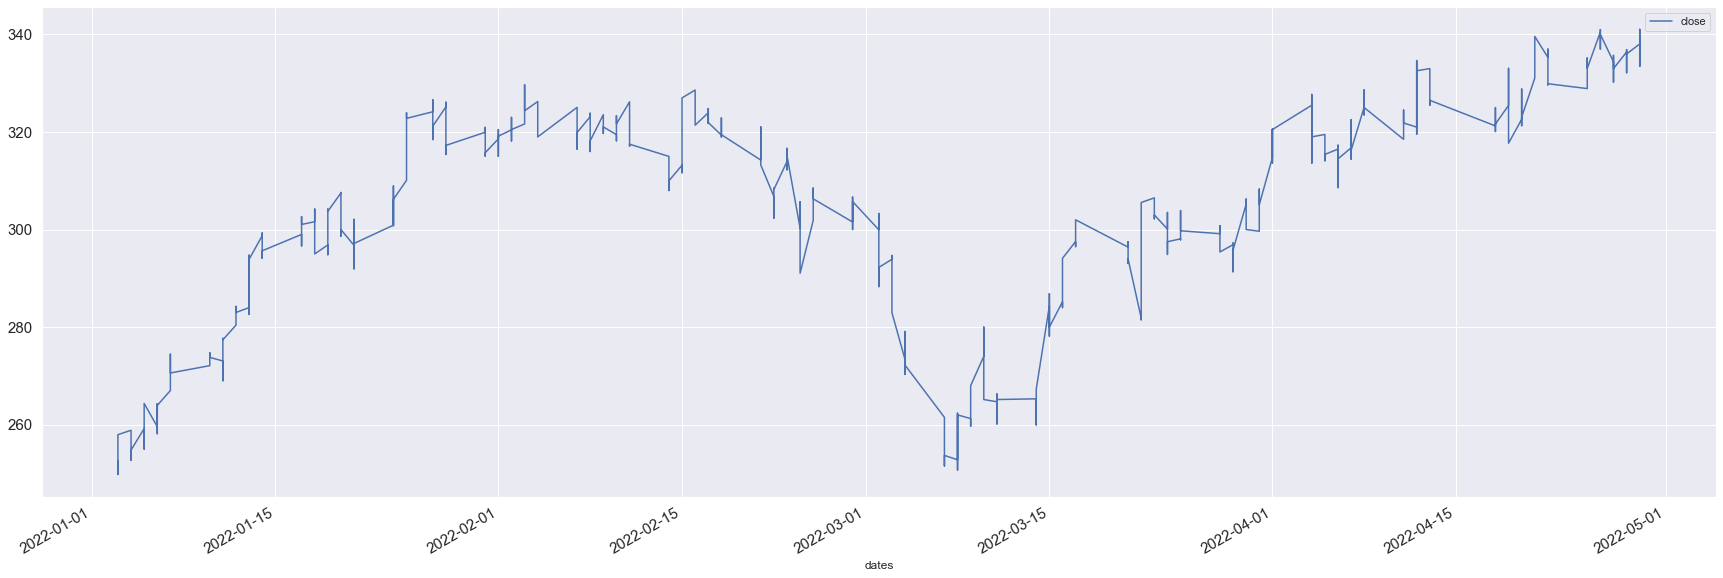

In [15]:

data.plot(x='dates', y='close', figsize=(30,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

<AxesSubplot:xlabel='dates'>

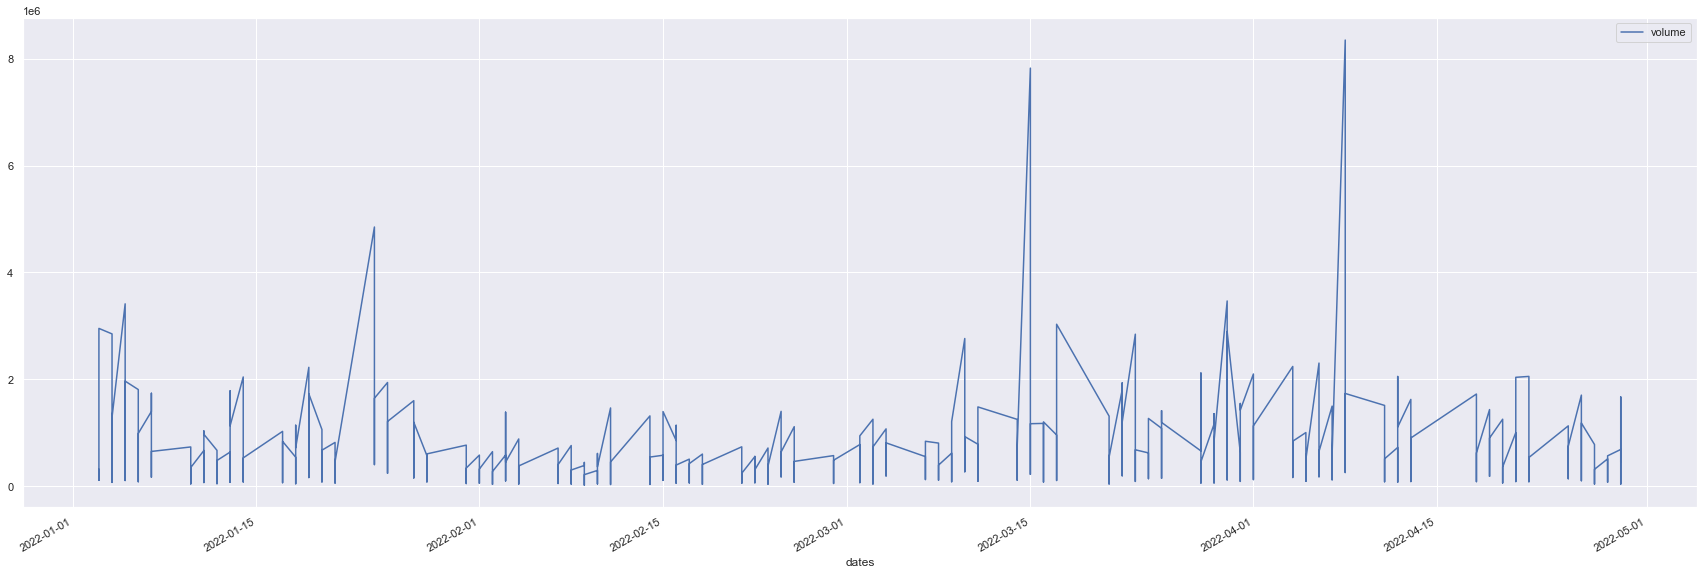

In [16]:
data.plot(x='dates', y='volume', figsize=(30,10))

In [17]:
data.describe()

,open,high,low,close,volume
count,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03
mean,304.072050,305.112750,303.062375,304.087500,3.995450e+05
std,23.117987,23.129187,23.076869,23.100806,4.938786e+05
min,249.850000,250.150000,249.000000,249.800000,2.229300e+04
25%,293.187500,294.125000,292.112500,293.250000,1.471022e+05
50%,306.525000,307.975000,305.550000,306.675000,2.484240e+05
75%,321.700000,322.500000,320.700000,321.650000,4.841755e+05
max,341.100000,344.600000,340.300000,341.050000,8.346762e+06


In [18]:
data['Daily_Percent_Change'] = data['close'].pct_change()*100
data.head()

,dates,open,high,low,close,volume,Daily_Percent_Change
0,2022-01-03,252.70,254.25,252.35,252.60,319790,NaN
1,2022-01-03,252.60,253.65,251.75,252.80,220927,0.079177
2,2022-01-03,252.95,254.90,252.30,252.85,526445,0.019778
3,2022-01-03,252.85,253.15,252.40,252.55,280414,-0.118647
4,2022-01-03,252.55,253.10,252.25,252.80,112875,0.098990


In [19]:
data.dropna(axis = 0, inplace = True)

(array([-6., -4., -2.,  0.,  2.,  4.,  6.,  8.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

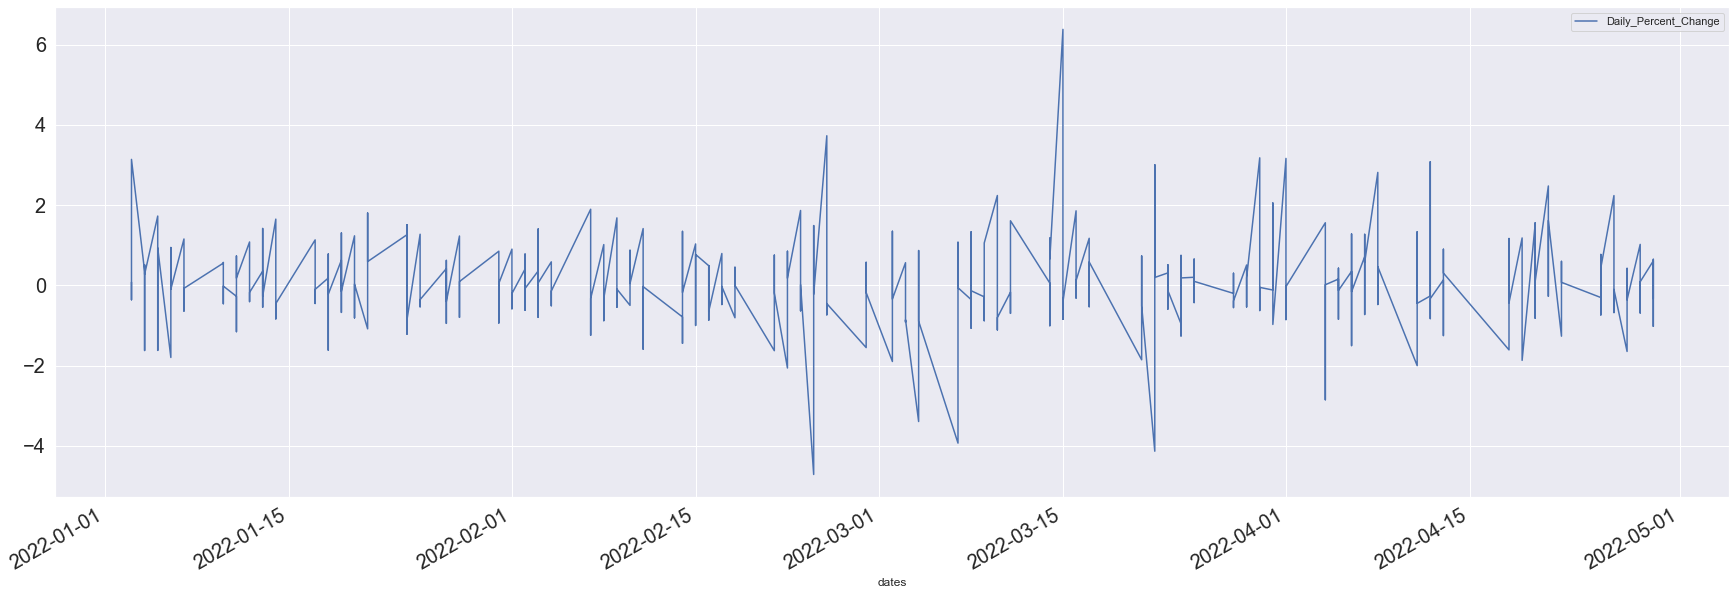

In [20]:
data.plot(x='dates', y='Daily_Percent_Change', figsize=(30,10))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

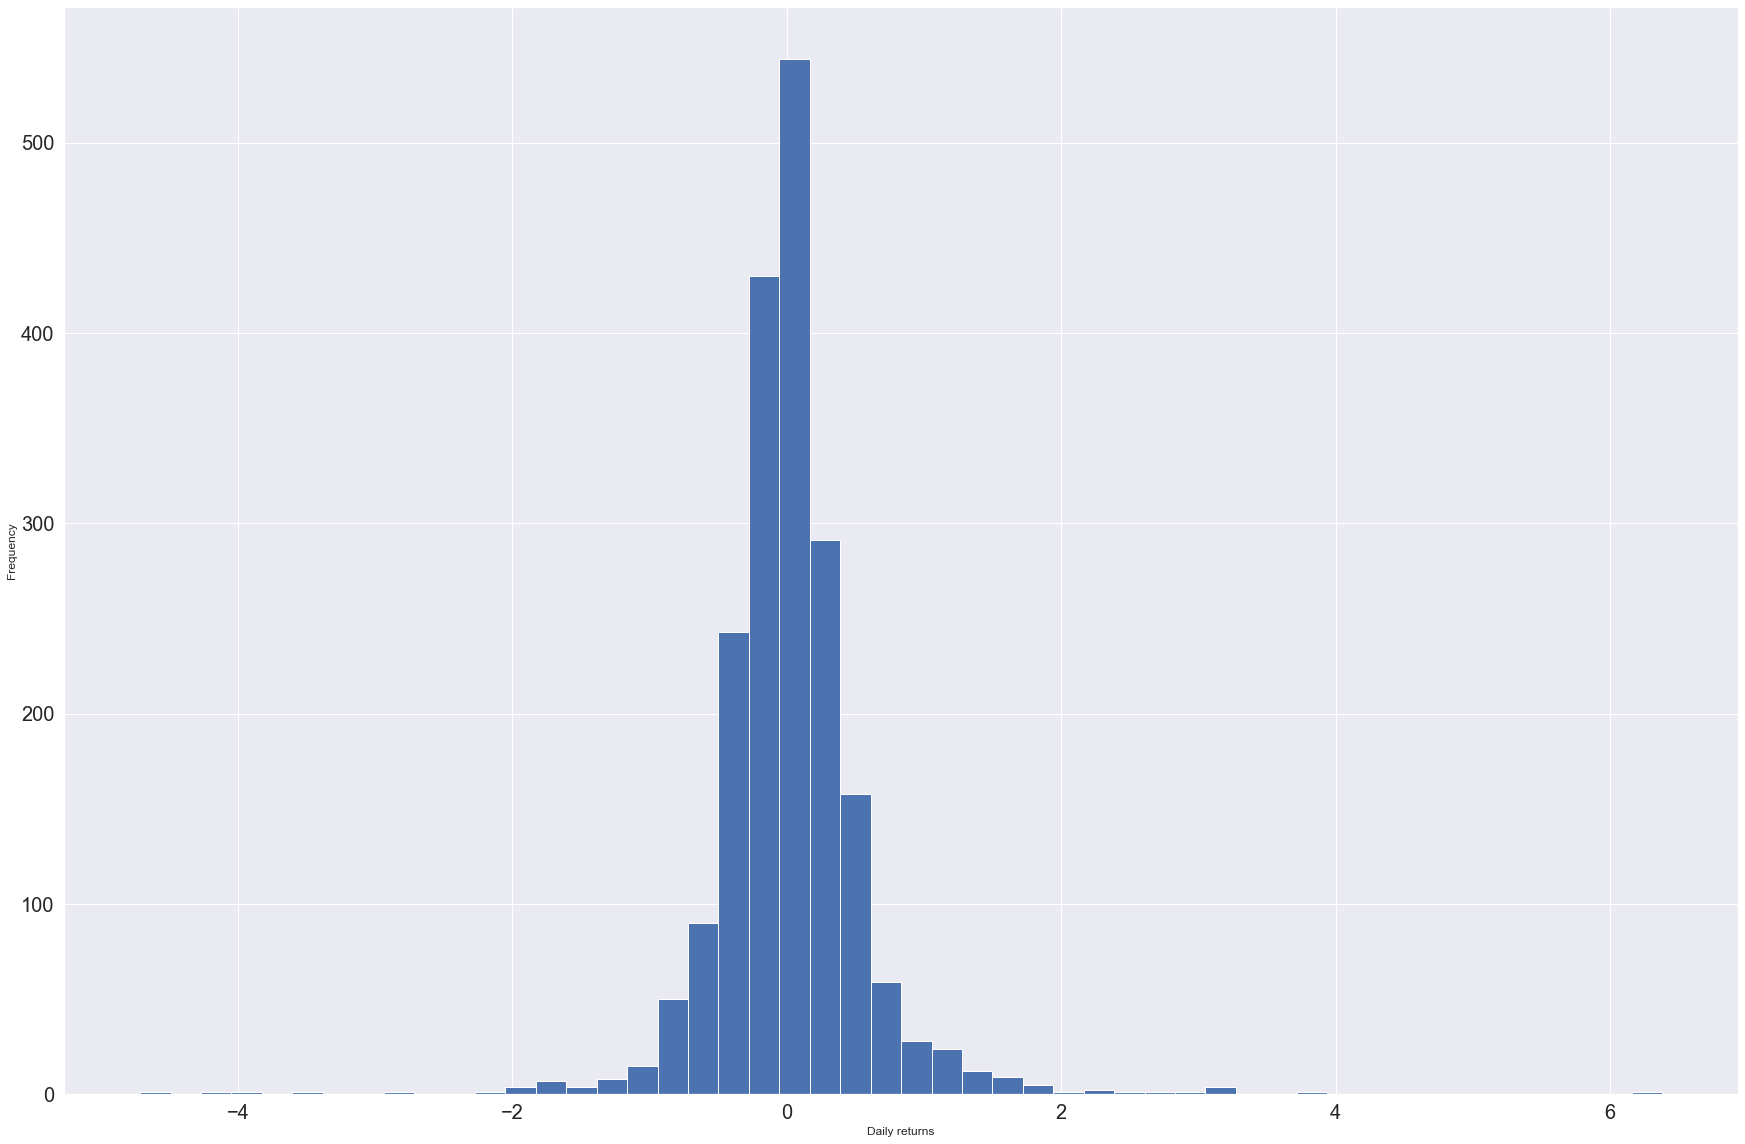

In [21]:
data['Daily_Percent_Change'].hist(bins = 50, figsize = (30,20)) 
plt.xlabel('Daily returns')
plt.ylabel('Frequency')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

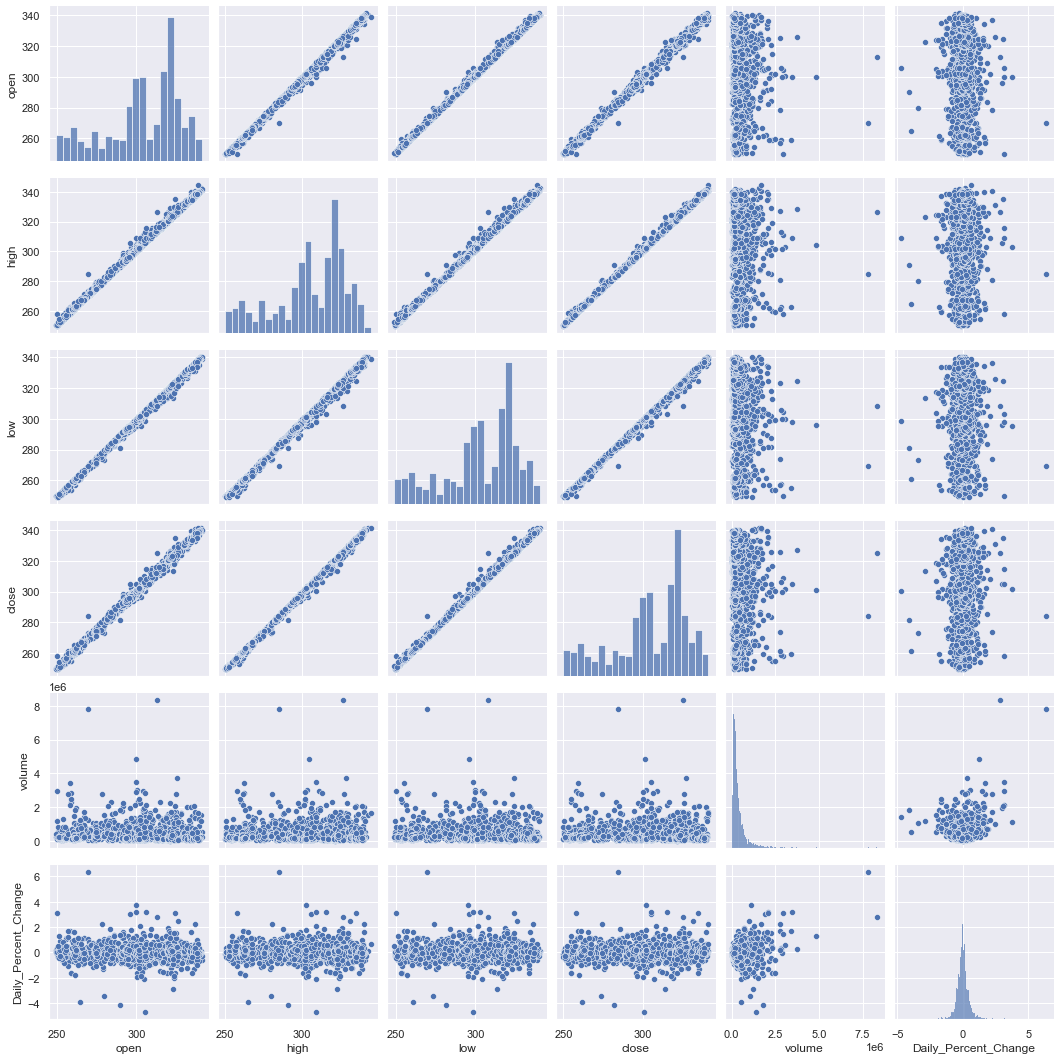

In [22]:
sns.pairplot(data)

In [23]:
df=data.drop(['Daily_Percent_Change'],axis=1,inplace=True)

In [24]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2)

In [25]:
train

,dates,open,high,low,close,volume
1150,2022-03-10,278.50,280.55,273.90,274.00,2764657
262,2022-01-17,300.05,300.70,299.15,299.20,300648
77,2022-01-06,261.95,263.25,259.40,259.95,963878
1818,2022-04-20,325.45,326.25,323.50,323.80,476275
1578,2022-04-05,316.75,317.60,316.30,317.05,191506
...,...,...,...,...,...,...
1855,2022-04-22,335.70,336.50,335.30,335.80,106480
1604,2022-04-06,308.70,311.55,308.00,309.75,847096
1266,2022-03-16,289.40,292.00,289.20,291.30,416801
103,2022-01-07,270.00,273.75,269.45,273.00,1215274


In [26]:
test

,dates,open,high,low,close,volume
621,2022-02-07,321.00,321.20,319.50,319.95,222110
797,2022-02-16,323.20,324.25,322.10,323.45,289499
923,2022-02-23,315.05,315.50,314.20,315.10,201601
757,2022-02-15,313.20,314.45,312.50,313.60,194497
25,2022-01-04,259.15,262.35,257.95,258.85,2850659
...,...,...,...,...,...,...
603,2022-02-07,317.90,318.90,316.00,316.50,182909
49,2022-01-04,254.30,255.40,253.90,254.80,1290984
1644,2022-04-07,316.60,317.85,316.30,316.35,140478
300,2022-01-19,292.00,297.50,287.50,296.85,2225835


In [27]:
train_open= train.iloc[:, 1:2].values

In [28]:
from sklearn.preprocessing import MinMaxScaler
ss= MinMaxScaler(feature_range=(0,1))
train_open_scaled= ss.fit_transform(train_open)
train_open_scaled[60]

array([0.81369863])

In [29]:
xtrain=[]
ytrain=[]
for i in range(60,len(train_open_scaled)):
    xtrain.append(train_open_scaled[i-60:i,0])
    ytrain.append(train_open_scaled[i,0])

xtrain, ytrain = np.array(xtrain), np.array(ytrain)

In [30]:
xtrain= np.reshape(xtrain,(xtrain.shape[0],xtrain.shape[1],1))
xtrain.shape

(1539, 60, 1)

In [31]:
import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [32]:
regression= Sequential()

regression.add(LSTM(units=50,return_sequences=True,kernel_initializer='glorot_uniform',input_shape=(xtrain.shape[1],1)))
regression.add(Dropout(0.2))

# Second LSTM layer with 0.2% dropout
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
regression.add(Dropout(0.2))

#Third LSTM layer with 0.2% dropout
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
regression.add(Dropout(0.2))

#Fourth LSTM layer with 0.2% dropout, we wont use return sequence true in last layers as we dont want to previous output
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform'))
regression.add(Dropout(0.2))
#Output layer , we wont pass any activation as its continous value model
regression.add(Dense(units=1))

#Compiling the network
regression.compile(optimizer='adam',loss='mean_squared_error')


#fitting the network
regression.fit(xtrain,ytrain,batch_size=30,epochs=100)

Epoch 1/100
52/52 [==============================] - 7s 62ms/step - loss: 0.0893
Epoch 2/100
52/52 [==============================] - 3s 62ms/step - loss: 0.0726
Epoch 3/100
52/52 [==============================] - 3s 63ms/step - loss: 0.0704
Epoch 4/100
52/52 [==============================] - 3s 62ms/step - loss: 0.0692
Epoch 5/100
52/52 [==============================] - 3s 65ms/step - loss: 0.0699
Epoch 6/100
52/52 [==============================] - 3s 62ms/step - loss: 0.0708
Epoch 7/100
52/52 [==============================] - 3s 66ms/step - loss: 0.0710
Epoch 8/100
52/52 [==============================] - 3s 64ms/step - loss: 0.0713
Epoch 9/100
52/52 [==============================] - 3s 62ms/step - loss: 0.0692
Epoch 10/100
52/52 [==============================] - 3s 62ms/step - loss: 0.0695
Epoch 11/100
52/52 [==============================] - 3s 63ms/step - loss: 0.0699
Epoch 12/100
52/52 [==============================] - 3s 63ms/step - loss: 0.0687
Epoch 13/100
52/52 [=====

In [34]:
test_open= test.iloc[:, 1:2].values 
total= pd.concat([train['open'],test['open']],axis=0) 
test_input = total[len(total)-len(test)-60:].values
test_input= test_input.reshape(-1,1) 
test_input= ss.transform(test_input)

In [35]:
xtest= []
for i in range(60,80):
    xtest.append(test_input[i-60:i,0])
    

In [36]:
xtest= np.array(xtest)

In [37]:
xtest= np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))
predicted_value= regression.predict(xtest)

1/1 [==============================] - 1s 927ms/step


In [38]:
predicted_value= ss.inverse_transform(predicted_value)

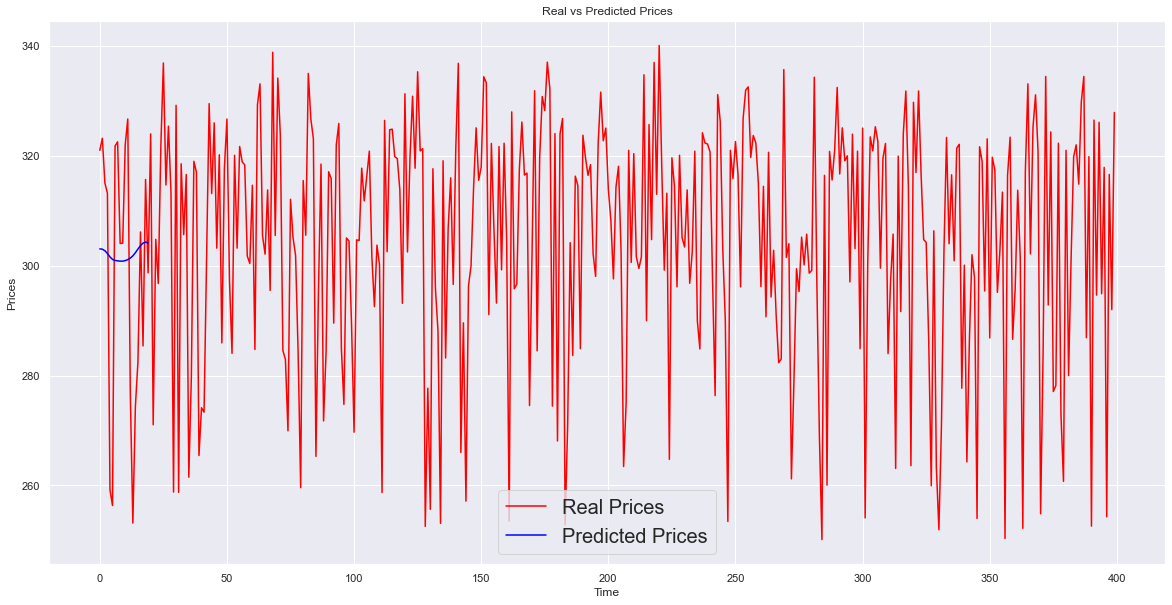

In [40]:
plt.figure(figsize=(20,10))
plt.plot(test_open,'red',label='Real Prices')
plt.plot(predicted_value,'blue',label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.title('Real vs Predicted Prices')
plt.legend(loc='best', fontsize=20)

In [41]:
from keras.wrappers.scikit_learn import KerasRegressor
def reg(optimizer):
    #initialisizng the model 
    regression= Sequential()

    #First Input layer and LSTM layer with 0.2% dropout
    regression.add(LSTM(units=50,return_sequences=True,kernel_initializer='glorot_uniform',input_shape=(xtrain.shape[1],1)))
    regression.add(Dropout(0.2))

    # Second LSTM layer with 0.2% dropout
    regression.add(LSTM(units=50,kernel_initializer= 'glorot_uniform',return_sequences=True))
    regression.add(Dropout(0.2))

    #Third LSTM layer with 0.2% dropout
    regression.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
    regression.add(Dropout(0.2))

    #Fourth LSTM layer with 0.2% dropout, we wont use return sequence true in last layers as we dont want to previous output
    regression.add(LSTM(units=50,kernel_initializer='glorot_uniform'))
    regression.add(Dropout(0.2))
    #Output layer , we wont pass any activation as its continous value model
    regression.add(Dense(units=1))

    #Compiling the network
    regression.compile(optimizer=optimizer,loss='mean_squared_error')
    
    return regression

model= KerasRegressor(build_fn=reg)

In [42]:
from sklearn.model_selection import RandomizedSearchCV
parameters = {'batch_size': [50, 32],
              'epochs': [50, 25],
              'optimizer': ['adam', 'rmsprop','sgd','adadelta']}
grid_search = RandomizedSearchCV(estimator = model,param_distributions=parameters,n_iter=5)
# fitting the model and Calculating the best parameters.
grid_search = grid_search.fit(xtrain, ytrain)
best_parameters = grid_search.best_params_

Epoch 1/50
39/39 [==============================] - 6s 55ms/step - loss: 0.0969
Epoch 2/50
39/39 [==============================] - 2s 56ms/step - loss: 0.0744
Epoch 3/50
39/39 [==============================] - 2s 57ms/step - loss: 0.0755
Epoch 4/50
39/39 [==============================] - 2s 58ms/step - loss: 0.0733
Epoch 5/50
39/39 [==============================] - 2s 60ms/step - loss: 0.0756
Epoch 6/50
39/39 [==============================] - 2s 57ms/step - loss: 0.0722
Epoch 7/50
39/39 [==============================] - 2s 56ms/step - loss: 0.0697
Epoch 8/50
39/39 [==============================] - 5s 120ms/step - loss: 0.0710
Epoch 9/50
39/39 [==============================] - 6s 141ms/step - loss: 0.0727
Epoch 10/50
39/39 [==============================] - 4s 112ms/step - loss: 0.0697
Epoch 11/50
39/39 [==============================] - 4s 105ms/step - loss: 0.0694
Epoch 12/50
39/39 [==============================] - 3s 86ms/step - loss: 0.0694
Epoch 13/50
39/39 [==============

10/10 [==============================] - 1s 19ms/step - loss: 0.0637
Epoch 1/50
39/39 [==============================] - 7s 65ms/step - loss: 0.1013
Epoch 2/50
39/39 [==============================] - 3s 74ms/step - loss: 0.0760
Epoch 3/50
39/39 [==============================] - 3s 75ms/step - loss: 0.0747
Epoch 4/50
39/39 [==============================] - 3s 76ms/step - loss: 0.0763
Epoch 5/50
39/39 [==============================] - 3s 73ms/step - loss: 0.0715
Epoch 6/50
39/39 [==============================] - 3s 72ms/step - loss: 0.0725
Epoch 7/50
39/39 [==============================] - 3s 79ms/step - loss: 0.0693
Epoch 8/50
39/39 [==============================] - 3s 77ms/step - loss: 0.0690
Epoch 9/50
39/39 [==============================] - 3s 74ms/step - loss: 0.0715
Epoch 10/50
39/39 [==============================] - 3s 73ms/step - loss: 0.0714
Epoch 11/50
39/39 [==============================] - 3s 72ms/step - loss: 0.0692
Epoch 12/50
39/39 [==============================

10/10 [==============================] - 1s 20ms/step - loss: 0.0620
Epoch 1/50
39/39 [==============================] - 8s 81ms/step - loss: 0.1063
Epoch 2/50
39/39 [==============================] - 3s 81ms/step - loss: 0.0763
Epoch 3/50
39/39 [==============================] - 3s 80ms/step - loss: 0.0775
Epoch 4/50
39/39 [==============================] - 3s 82ms/step - loss: 0.0721
Epoch 5/50
39/39 [==============================] - 3s 83ms/step - loss: 0.0707
Epoch 6/50
39/39 [==============================] - 3s 81ms/step - loss: 0.0693
Epoch 7/50
39/39 [==============================] - 3s 80ms/step - loss: 0.0687
Epoch 8/50
39/39 [==============================] - 4s 90ms/step - loss: 0.0690
Epoch 9/50
39/39 [==============================] - 3s 84ms/step - loss: 0.0694
Epoch 10/50
39/39 [==============================] - 4s 91ms/step - loss: 0.0685
Epoch 11/50
39/39 [==============================] - 3s 85ms/step - loss: 0.0679
Epoch 12/50
39/39 [==============================

39/39 [==============================] - 3s 87ms/step - loss: 0.0716
Epoch 50/50
10/10 [==============================] - 1s 20ms/step - loss: 0.0660
Epoch 1/50
39/39 [==============================] - 8s 79ms/step - loss: 0.4557
Epoch 2/50
39/39 [==============================] - 3s 86ms/step - loss: 0.4503
Epoch 3/50
39/39 [==============================] - 3s 84ms/step - loss: 0.4428
Epoch 4/50
39/39 [==============================] - 3s 87ms/step - loss: 0.4371
Epoch 5/50
39/39 [==============================] - 3s 85ms/step - loss: 0.4300
Epoch 6/50
39/39 [==============================] - 3s 81ms/step - loss: 0.4225
Epoch 7/50
39/39 [==============================] - 3s 84ms/step - loss: 0.4169
Epoch 8/50
39/39 [==============================] - 3s 85ms/step - loss: 0.4095
Epoch 9/50
39/39 [==============================] - 3s 83ms/step - loss: 0.4022
Epoch 10/50
39/39 [==============================] - 3s 79ms/step - loss: 0.3950
Epoch 11/50
39/39 [==============================

39/39 [==============================] - 3s 83ms/step - loss: 0.0738
Epoch 49/50
39/39 [==============================] - 3s 83ms/step - loss: 0.0730
Epoch 50/50
10/10 [==============================] - 1s 22ms/step - loss: 0.0690
Epoch 1/50
39/39 [==============================] - 7s 78ms/step - loss: 0.3907
Epoch 2/50
39/39 [==============================] - 3s 80ms/step - loss: 0.3852
Epoch 3/50
39/39 [==============================] - 3s 83ms/step - loss: 0.3796
Epoch 4/50
39/39 [==============================] - 3s 80ms/step - loss: 0.3732
Epoch 5/50
39/39 [==============================] - 3s 79ms/step - loss: 0.3679
Epoch 6/50
39/39 [==============================] - 3s 79ms/step - loss: 0.3610
Epoch 7/50
39/39 [==============================] - 3s 79ms/step - loss: 0.3540
Epoch 8/50
39/39 [==============================] - 3s 79ms/step - loss: 0.3480
Epoch 9/50
39/39 [==============================] - 3s 80ms/step - loss: 0.3392
Epoch 10/50
39/39 [==============================

39/39 [==============================] - 4s 91ms/step - loss: 0.0704
Epoch 48/50
39/39 [==============================] - 4s 92ms/step - loss: 0.0710
Epoch 49/50
39/39 [==============================] - 4s 91ms/step - loss: 0.0699
Epoch 50/50
10/10 [==============================] - 1s 22ms/step - loss: 0.0745
Epoch 1/50
39/39 [==============================] - 9s 103ms/step - loss: 0.1182
Epoch 2/50
39/39 [==============================] - 4s 96ms/step - loss: 0.0705
Epoch 3/50
39/39 [==============================] - 4s 100ms/step - loss: 0.0696
Epoch 4/50
39/39 [==============================] - 4s 99ms/step - loss: 0.0677
Epoch 5/50
39/39 [==============================] - 4s 97ms/step - loss: 0.0678
Epoch 6/50
39/39 [==============================] - 4s 99ms/step - loss: 0.0691
Epoch 7/50
39/39 [==============================] - 4s 102ms/step - loss: 0.0692
Epoch 8/50
39/39 [==============================] - 4s 95ms/step - loss: 0.0687
Epoch 9/50
39/39 [===========================

39/39 [==============================] - 5s 116ms/step - loss: 0.0685
Epoch 47/50
39/39 [==============================] - 4s 100ms/step - loss: 0.0681
Epoch 48/50
39/39 [==============================] - 4s 99ms/step - loss: 0.0679
Epoch 49/50
39/39 [==============================] - 4s 98ms/step - loss: 0.0682
Epoch 50/50
10/10 [==============================] - 1s 26ms/step - loss: 0.0601
Epoch 1/50
39/39 [==============================] - 9s 100ms/step - loss: 0.1071
Epoch 2/50
39/39 [==============================] - 4s 99ms/step - loss: 0.0692
Epoch 3/50
39/39 [==============================] - 4s 100ms/step - loss: 0.0688
Epoch 4/50
39/39 [==============================] - 4s 103ms/step - loss: 0.0687
Epoch 5/50
39/39 [==============================] - 4s 103ms/step - loss: 0.0677
Epoch 6/50
39/39 [==============================] - 4s 106ms/step - loss: 0.0680
Epoch 7/50
39/39 [==============================] - 4s 108ms/step - loss: 0.0678
Epoch 8/50
39/39 [=====================

KeyboardInterrupt: 

In [ ]:
model=grid_search.best_estimator_.fit(xtrain,ytrain)
model
predicted_value= grid_search.predict(xtest)
predicted_value= ss.inverse_transform(predicted_value.reshape(-1,1))


plt.figure(figsize=(20,10))
plt.plot(test_open,'red',label='Real Prices')
plt.plot(predicted_value,'blue',label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.title('Real vs Predicted Prices')
plt.legend(loc='best', fontsize=20)
